# Met Office Climate Data Hackathon

## Using xclim with UK Climate Projections data

This notebook shows you how to work with the UK Climate Projections netCDF files available on the CEDA Archive 
using the xarray Python library. It demonstrates:
 * the capability of the xclim Python package

This module requires the following:

*  Python packages in your environment 
 * xarray
 * xclim - you will need to add this to the requirements file described in [Coding Tips](https://github.com/COP26-Hackathon/Met-Office-Climate-Data-Challenge-March_2021/wiki/Coding-Tips#setting-up-your-code-environment). Also ensure that the latest nc-time-axis is installed too.
 * cartopy
 * numpy
 * matplotlib
 
* UKCP data files
 * daily maximum surface air temperatures (available from CEDA Archive [here](http://data.ceda.ac.uk/badc/ukcp18/data/land-rcm/uk/12km/rcp85/01/tasmax/day/latest))

## Preparatory actions
Load packages

In [1]:
import xclim
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

Assign file locations

In [12]:
UKCP_FILE_DIRECTORY_TASMAX = 'Insert download directory here'

Load UKCP data to work with

In [13]:
path=UKCP_FILE_DIRECTORY_TASMAX
fi='/tasmax_rcp26_land-gcm_uk_60km_*.nc'
tasmax_ds=xr.open_mfdataset(path+fi)
tasmax_da=tasmax_ds.tasmax.sel(time=slice('1980','2050'))

In [4]:
print('indices')
dir(xclim.indices)

indices


['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_multivariate',
 '_simple',
 '_threshold',
 'base_flow_index',
 'cold_and_dry_days',
 'cold_spell_days',
 'cold_spell_duration_index',
 'consecutive_frost_days',
 'cooling_degree_days',
 'daily_freezethaw_cycles',
 'daily_pr_intensity',
 'daily_temperature_range',
 'daily_temperature_range_variability',
 'days_over_precip_thresh',
 'extreme_temperature_range',
 'fraction_over_precip_thresh',
 'freshet_start',
 'frost_days',
 'growing_degree_days',
 'growing_season_length',
 'heat_wave_frequency',
 'heat_wave_index',
 'heat_wave_max_length',
 'heating_degree_days',
 'ice_days',
 'liquid_precip_ratio',
 'max_1day_precipitation_amount',
 'max_n_day_precipitation_amount',
 'maximum_consecutive_dry_days',
 'maximum_consecutive_tx_days',
 'maximum_consecutive_wet_days',
 'precip_accumulation',
 'rain_on_frozen_ground_days',
 'tg10p',
 'tg90p',
 'tg_max',
 'tg_mean'

Calculate some area weights

In [5]:
weights = np.cos(np.deg2rad(tasmax_da.latitude))
weights.name = "weights"
print(weights)

<xarray.DataArray 'weights' (projection_y_coordinate: 23, projection_x_coordinate: 17)>
dask.array<cos, shape=(23, 17), dtype=float64, chunksize=(23, 17), chunktype=numpy.ndarray>
Coordinates:
  * projection_y_coordinate  (projection_y_coordinate) float64 -9e+04 ... 1.2...
  * projection_x_coordinate  (projection_x_coordinate) float64 -2.1e+05 ... 7...
    latitude                 (projection_y_coordinate, projection_x_coordinate) float64 dask.array<chunksize=(23, 17), meta=np.ndarray>
    longitude                (projection_y_coordinate, projection_x_coordinate) float64 dask.array<chunksize=(23, 17), meta=np.ndarray>
Attributes:
    units:          degrees_north
    standard_name:  latitude


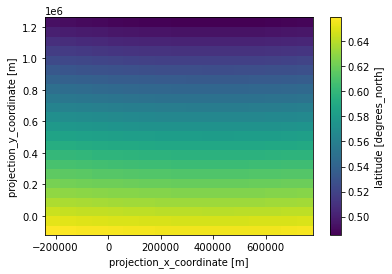

In [8]:
weights.plot.pcolormesh()
plt.show()

Calculate tropical night index with threshold of 25C and present results on annual time-scale

In [6]:
trop_n=xclim.indices.tropical_nights(tasmax_da,thresh='25 C', freq='AS-DEC')
trop_n_m=trop_n.mean(dim=['projection_y_coordinate','projection_x_coordinate'])  # not area weight

trop_n_w=trop_n.weighted(weights)
trop_n_m_w=trop_n_w.mean(dim=['projection_y_coordinate','projection_x_coordinate'])  # area weighted

Plot both curves

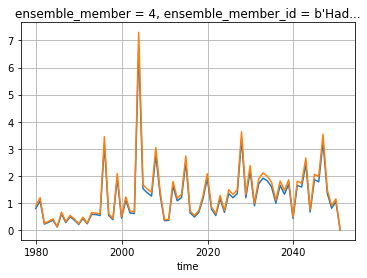

In [7]:
trop_n_m.plot()
trop_n_m_w.plot()       # not very different as considering a small area 
plt.grid()

Find and plot hottest day of the year

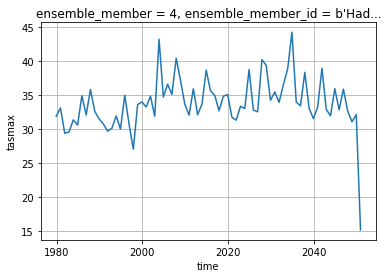

In [8]:
tx_max=xclim.indices.tx_max(tasmax_da, freq='AS-DEC')
tx_max_m=tx_max.max(dim=['projection_y_coordinate','projection_x_coordinate'])
tx_max_m.plot()
plt.grid()

Why is the final value so low? 

It's because the year has only December in it. We could recalculate with only full years.

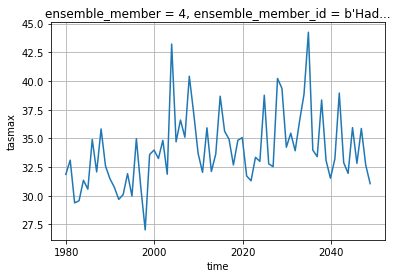

In [9]:
tasmax_da=tasmax_ds.tasmax.sel(time=slice('1979-12','2049-11'))
tx_max=xclim.indices.tx_max(tasmax_da, freq='AS-DEC')
tx_max_m=tx_max.max(dim=['projection_y_coordinate','projection_x_coordinate'])
tx_max_m.plot()
plt.grid()